># 2. FFNN - Fast Forward Neural Networks
* Simplest NN model
* Input - (hidden) - Output

### Scenario
1. Read Data
1. Build Model
1. Model Save & Restore
1. Tensorboard

### Theory

* Input $\rightarrow$ Output
$$ y_0 = w_{00}x_0 + w_{01}x_1 + w_{02}x_2 + w_{03}x_3 ... w_{0n}x_n $$
$$ y_1 = w_{10}x_0 + w_{11}x_1 + w_{12}x_2 + w_{13}x_3 ... w_{1n}x_n $$
$$ y_2 = w_{20}w_0 + w_{21}x_1 + w_{22}x_2 + w_{23}x_3 ... w_{2n}x_n $$
$$ y_3 = w_{30}w_0 + w_{31}x_1 + w_{32}x_2 + w_{33}x_3 ... w_{3n}x_n $$
$$...$$
$$ y_m = w_{m0}x_0 + w_{m1}x_1 + w_{m2}x_2 + w_{m3}x_3 ... w_{mn}x_n $$

$$ \begin{bmatrix} y_0\\y_1\\y_2\\y_3\\...\\y_m \end{bmatrix} = \begin{bmatrix} w_{00}&w_{01}&w_{02}&w_{03}&...&w_{0n} \\ w_{10}&w_{11}&w_{12}&w_{13}&...&w_{1n} \\ w_{20}&w_{21}&w_{22}&w_{23}&...&w_{2n} \\ w_{30}&w_{31}&w_{32}&w_{33}&...&w_{3n} \\ ...&...&...&...&...&... \\ w_{m0}&w_{m1}&w_{m2}&w_{m3}&...&w_{mn} \end{bmatrix} \begin{bmatrix} x_0\\x_1\\x_2\\x_3\\...\\x_n \end{bmatrix} $$
$$$$
$$ Y = W^TX $$

* Output $\rightarrow$ Input

$$ h = \sigma(W^TX) $$
$$$$
$$ \sigma(x) = \frac{1}{1 + e^{-(wx + b)}} $$

># 2.1. Implementation - Binary Classification

### Import

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import csv

### Generate Data

In [2]:
samples = 1000
test_samples = 100
train_dataset = './dataset/train_dataset.csv'
test_dataset = './dataset/test_dataset.csv'

def write_dataset(samples, test_samples, train_dir, test_dir):
    up = [i for i in range(10)]
    down = [9-i for i in range(10)]

    data = []
    label = []
    for i in range(samples):
        data.append(up)
        data.append(down)
        label.append([1])
        label.append([0])

    with open(train_dataset, 'w') as csvfile:
        writer = csv.writer(csvfile)
        for i in range(samples-test_samples):
            writer.writerow(label[i] + data[i])
        print('train data is written')

    with open(test_dataset, 'w') as csvfile:
        writer = csv.writer(csvfile)
        for i in range(test_samples):
            writer.writerow(label[i] + data[i])
        print('test data is written')
        
write_dataset(1000, 100, train_dataset, test_dataset)

train data is written
test data is written


### Create Dataset
* Put filepath / Set batch size / Shuffle with random seed

In [3]:
dataset = tf.contrib.data.TextLineDataset(train_dataset)
dataset = dataset.batch(32)
dataset = dataset.shuffle(77)
dataset = dataset.repeat(100)

### Create Session

In [4]:
itr = dataset.make_one_shot_iterator()

batch = itr.get_next()

# record_defaults: in case of empty data, fill with record_defaults
decoded_batch = tf.decode_csv(batch, record_defaults=[[0]]*11)

### Reshape & Cast

In [5]:
# Reshape
label = tf.reshape(decoded_batch[0], [-1, 1])
label = tf.expand_dims(decoded_batch[0], axis=-1)
feature = tf.stack(decoded_batch[1:], axis=1)

# Cast
label = tf.cast(label, tf.float32)
feature = tf.cast(feature, tf.float32)

### Create Layers
* units: no. of nodes

In [6]:
def bin_model(x, activation=None, reuse=False):
    layer1 = tf.layers.dense(x, units=9, activation=activation, reuse=reuse, name='layer1')
    layer2 = tf.layers.dense(layer1, units=7, activation=activation, reuse=reuse, name='layer2')
    layer3 = tf.layers.dense(layer2, units=5, activation=activation, reuse=reuse, name='layer3')
    layer4 = tf.layers.dense(layer3, units=3, activation=activation, reuse=reuse, name='layer4')
    out = tf.layers.dense(layer4, units=1, reuse=reuse, name='out')
    return out
        
out = bin_model(feature, activation=tf.nn.relu)

### Define loss & train_op

In [7]:
loss = tf.losses.sigmoid_cross_entropy(label, out)
train_op = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


### Run Session

step: 0, loss: 0.9482421278953552
step: 10, loss: 0.7128403186798096
step: 20, loss: 0.6632524132728577
step: 30, loss: 0.6068441867828369
step: 40, loss: 0.5468055009841919
step: 50, loss: 0.4955664277076721
step: 60, loss: 0.44572773575782776
step: 70, loss: 0.35237836837768555
step: 80, loss: 0.3364059031009674
step: 90, loss: 0.33025437593460083
step: 100, loss: 0.32187265157699585


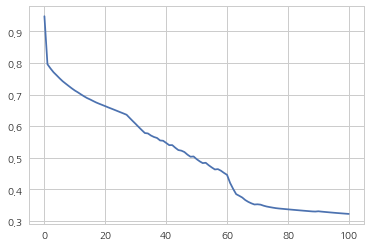

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    _loss_ = []
    for i in range(101):
        _, _loss = sess.run([train_op, loss])
        _loss_.append(_loss)
        if i%10 == 0:
            print('step: {}, loss: {}'.format(i, _loss))
        
    plt.plot(_loss_)

### Test Data

In [9]:
t_dataset = tf.contrib.data.TextLineDataset(test_dataset).batch(32).shuffle(77).repeat(100)

t_itr = t_dataset.make_one_shot_iterator()

t_batch = t_itr.get_next()

t_decoded_batch = tf.decode_csv(t_batch, record_defaults=[[0]]*11)

In [10]:
t_label = tf.reshape(t_decoded_batch[0], [-1, 1])
t_feature = tf.stack(t_decoded_batch[1:], axis=1)

t_label = tf.cast(t_label, tf.float32)
t_feature = tf.cast(t_feature, tf.float32)

In [11]:
print(t_label)
print(t_feature)

Tensor("Cast_2:0", shape=(?, 1), dtype=float32)
Tensor("Cast_3:0", shape=(?, 10), dtype=float32)


In [12]:
t_out = bin_model(t_feature, activation=tf.nn.relu, reuse=True)

pred = tf.nn.sigmoid(t_out)

accuracy = tf.metrics.accuracy(t_label, tf.round(pred))

### Save Model

In [13]:
saver = tf.train.Saver()

### Visualize Log

In [18]:
tf.summary.scalar('loss', loss)

merged = tf.summary.merge_all()

### Check Accuracy

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer()) # because of the accuracy
    writer = tf.summary.FileWriter('./logs/', sess.graph)
    for i in range(101):
        _, _loss, _acc, _summary = sess.run([train_op, loss, accuracy, merged])
        writer.add_summary(_summary, i)
        if i%10 == 0:
            print('step: {}, loss: {}, accuracy: {}'.format(i, _loss, _acc))
            
    saver.save(sess, './logs/ffnn')

step: 0, loss: 0.95085209608078, accuracy: (0.0, 0.5)
step: 10, loss: 0.39361414313316345, accuracy: (0.5, 0.5)
step: 20, loss: 0.31506291031837463, accuracy: (0.69999999, 0.71804512)
step: 30, loss: 0.2891136407852173, accuracy: (0.79619563, 0.8046875)
step: 40, loss: 0.26506102085113525, accuracy: (0.85000002, 0.85465115)
step: 50, loss: 0.24175995588302612, accuracy: (0.87864077, 0.8817035)
step: 60, loss: 0.21771368384361267, accuracy: (0.89999998, 0.90208876)
step: 70, loss: 0.1916748434305191, accuracy: (0.91496599, 0.91648108)
step: 80, loss: 0.16408930718898773, accuracy: (0.92500001, 0.92618108)
step: 90, loss: 0.1362316608428955, accuracy: (0.93374556, 0.93386245)
step: 100, loss: 0.10992591083049774, accuracy: (0.94, 0.94075829)


### See in Tensorboard
```
$ tensorboard -logdir=./logs
```
Go to Chrome / 6006

### Restore

In [15]:
with tf.Session() as sess:
    saver.restore(sess, './logs/ffnn')
    _pred = sess.run(pred)
    print(_pred)

INFO:tensorflow:Restoring parameters from ./logs/ffnn
[[  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]
 [  7.09242880e-01]
 [  8.00312864e-06]]


### Vanishing Gradient
* When using sigmoid function, the gradient of the sigmoid is multiplied during the learning process
* Since the gradient of the sigmoid function vanishes for large/small values, the learning becomes painfully slow
* Solved by trying different activation functions (e.g. ReLU)

># 2.2. Multiple Classification

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import csv

In [3]:
samples = 1000
test_samples = 100
train_dataset = './dataset/train_dataset.csv'
test_dataset = './dataset/test_dataset.csv'

up = [i for i in range(10)]
down = [9-i for i in range(10)]
flat = [5 for i in range(10)]

data = []
label = []
for i in range(samples):
    data.append(up)
    data.append(flat)
    data.append(down)
    label.append([0])
    label.append([1])
    label.append([2])
    
for i in range(10):
    print('data: {}, label {}'.format(data[i], label[i]))

    
    
with open(train_dataset, 'w') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(samples-test_samples):
        writer.writerow(label[i] + data[i])
    print('train data is written')
        
with open(test_dataset, 'w') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(test_samples):
        writer.writerow(label[i] + data[i])
    print('test data is written')

data: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], label [0]
data: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], label [1]
data: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0], label [2]
data: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], label [0]
data: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], label [1]
data: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0], label [2]
data: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], label [0]
data: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], label [1]
data: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0], label [2]
data: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], label [0]
train data is written
test data is written


In [4]:
tf.reset_default_graph()
trainset = tf.contrib.data.TextLineDataset(train_dataset).batch(10)
testset = tf.contrib.data.TextLineDataset(test_dataset).batch(10)

train_itr = trainset.make_one_shot_iterator()
test_itr = testset.make_one_shot_iterator()

train_batch = train_itr.get_next()
test_batch = test_itr.get_next()

decoded_train = tf.decode_csv(train_batch, [[0]]*11)
decoded_test = tf.decode_csv(test_batch, [[0]]*11)

train_label = tf.one_hot(decoded_train[0], depth=3, axis=-1, dtype=tf.float32)
test_label = tf.reshape(decoded_test[0], [-1, 1])

train_data = tf.stack(decoded_train[1:], axis=1)
test_data = tf.stack(decoded_test[1:], axis=1)

test_data = tf.cast(test_data, tf.float32)
train_data = tf.cast(train_data, tf.float32)

print(train_data)
print(test_data)
print(train_label)
print(test_label)

Tensor("Cast_1:0", shape=(?, 10), dtype=float32)
Tensor("Cast:0", shape=(?, 10), dtype=float32)
Tensor("one_hot:0", shape=(?, 3), dtype=float32)
Tensor("Reshape:0", shape=(?, 1), dtype=int32)


In [5]:
def multi_class_model(x, activation, reuse=False):
    layer1 = tf.layers.dense(x, 10, activation=activation, reuse=reuse, name='layer1')
    layer2 = tf.layers.dense(layer1, 10, activation=activation, reuse=reuse, name='layer2')
    layer3 = tf.layers.dense(layer2, 10, activation=activation, reuse=reuse, name='layer3')
    layer4 = tf.layers.dense(layer3, 10, activation=activation, reuse=reuse, name='layer4')
    return tf.layers.dense(layer4, 3, activation=activation, reuse=reuse, name='layer_out')

train_out = multi_class_model(train_data, tf.nn.sigmoid)
test_out = multi_class_model(test_data, tf.nn.sigmoid, True)

for var in tf.trainable_variables():
    print(var)

<tf.Variable 'layer1/kernel:0' shape=(10, 10) dtype=float32_ref>
<tf.Variable 'layer1/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'layer2/kernel:0' shape=(10, 10) dtype=float32_ref>
<tf.Variable 'layer2/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'layer3/kernel:0' shape=(10, 10) dtype=float32_ref>
<tf.Variable 'layer3/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'layer4/kernel:0' shape=(10, 10) dtype=float32_ref>
<tf.Variable 'layer4/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'layer_out/kernel:0' shape=(10, 3) dtype=float32_ref>
<tf.Variable 'layer_out/bias:0' shape=(3,) dtype=float32_ref>


In [6]:
loss = tf.losses.softmax_cross_entropy(train_label, train_out)
train_op = tf.train.GradientDescentOptimizer(1e-6).minimize(loss)

In [7]:
pred = tf.nn.softmax(test_out)
accuracy = tf.metrics.accuracy(test_label, tf.argmax(pred, axis=1))

In [8]:
saver = tf.train.Saver()

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    for i in range(10):
        while True:
            try:
                _, _loss = sess.run([train_op, loss])
                _acc = sess.run(accuracy)
            except tf.errors.OutOfRangeError:
                break
                
        print('epoch: {}, loss: {}, acc: {}'.format(i, _loss, _acc[0]))
        saver.save(sess, './logs/model')

epoch: 0, loss: 1.1065032482147217, acc: 0.3333333432674408
epoch: 1, loss: 1.0911767482757568, acc: 0.3333333432674408
epoch: 2, loss: 1.1273247003555298, acc: 0.3333333432674408
epoch: 3, loss: 1.1065032482147217, acc: 0.3333333432674408
epoch: 4, loss: 1.0911767482757568, acc: 0.3333333432674408
epoch: 5, loss: 1.1273247003555298, acc: 0.3333333432674408
epoch: 6, loss: 1.1065032482147217, acc: 0.3333333432674408
epoch: 7, loss: 1.0911767482757568, acc: 0.3333333432674408
epoch: 8, loss: 1.1273247003555298, acc: 0.3333333432674408
epoch: 9, loss: 1.1065032482147217, acc: 0.3333333432674408
